In [ ]:
!pip install mediapipe

     |████████████████████████████████| 32.2 MB 48 kB/s 


In [ ]:
import pandas as pd
import numpy as np
import PIL
from PIL import Image
import cv2
import os

from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

import dlib
from skimage import io
import matplotlib.pyplot as plt
from numpy import asarray


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
imgPath=[]
resize= 1
frame_count_real = []
frame_count_fake = []


# Function to extract frames
def FrameCapture(path,globalCount,type_dataset,label):
    frame_count=[]
    imgPath = []
    temp = 0
    v_cap = cv2.VideoCapture(path)
    v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Pick 'n_frames' evenly spaced frames to sample
    sample = np.linspace(0, v_len - 1, n_frames).astype(int) #Index in sample array are the frames which will be extracted.

    # Loop through frames
    
    frames = []
    for j in range(v_len):
        success = v_cap.grab()
        if j in sample:
            # Load frame
            success, frame = v_cap.read()
            if not success:
                
                continue
            
            frame = Image.fromarray(frame)
            
            # Resize frame to desired size
            if resize is not None:
                frame = frame.resize([int(d * resize) for d in frame.size])
                frame = np.asarray(frame)
            frames.append(frame)
    
    # Used as counter variable
  
    # checks whether frames were extracted
    count = globalCount
    currentCount = 0
    success = 1
  
    while success and currentCount<min(n_frames,len(frames)):
  
        
        cv2.imwrite("All_Images/" + str(type_dataset) + "_"+ str(label) + "_frame%d.jpg" % (count//n_frames),frames[int(currentCount)])

        imgPath.append("All_Images/" + str(type_dataset) + "_"+ str(label) + "_frame%d.jpg"%(count//n_frames))
  
        count += n_frames
        currentCount += 1
      
    if(type_dataset=="Test"):
      frame_count.append(currentCount)

    return imgPath,count,frame_count



In [ ]:
import os


n_frames = 32
resize= 1

def captureFrame(type_dataset,label):
  imgPath = []
  frame_count = []
  count = 0
  video_label=[]
  for file in os.listdir("/content/drive/MyDrive/Deepfake_Mix/"+str(type_dataset)+"/"+str(label)):
      path=os.path.join("/content/drive/MyDrive/Deepfake_Mix/"+str(type_dataset)+"/"+str(label), file)
      temp , count ,x= FrameCapture(path,count,type_dataset,label)
      imgPath = imgPath +  temp
      if (type_dataset == 'Test'):
        frame_count.append(x[0])
        if label=='Fake':
          video_label.append(0)
        else:
          video_label.append(1)
  return imgPath,frame_count,video_label

In [ ]:
imgPath_train_fake,  frame_count_train_fake, _= captureFrame("Train","Fake")
imgPath_train_real,  frame_count_train_real, _= captureFrame("Train","Real")
imgPath_val_fake,  frame_count_val_fake, video_label_val_fake= captureFrame("Val","Fake")
imgPath_val_real,  frame_count_val_real, video_label_val_real= captureFrame("Val","Real")
imgPath_test_fake,  frame_count_test_fake, video_label_test_fake= captureFrame("Test","Fake")
imgPath_test_real,  frame_count_test_real, video_label_test_real= captureFrame("Test","Real")

In [ ]:
print(len(imgPath_train_fake))
print(len(imgPath_train_real))
print(imgPath_val_fake)
print(imgPath_val_real)
print(len(imgPath_test_fake))
print(len(imgPath_test_real))

1357
1456
['All_Images/Val_Fake_frame0.jpg', 'All_Images/Val_Fake_frame1.jpg', 'All_Images/Val_Fake_frame2.jpg', 'All_Images/Val_Fake_frame3.jpg', 'All_Images/Val_Fake_frame4.jpg', 'All_Images/Val_Fake_frame5.jpg', 'All_Images/Val_Fake_frame6.jpg', 'All_Images/Val_Fake_frame7.jpg', 'All_Images/Val_Fake_frame8.jpg', 'All_Images/Val_Fake_frame9.jpg', 'All_Images/Val_Fake_frame10.jpg', 'All_Images/Val_Fake_frame11.jpg', 'All_Images/Val_Fake_frame12.jpg', 'All_Images/Val_Fake_frame13.jpg', 'All_Images/Val_Fake_frame14.jpg', 'All_Images/Val_Fake_frame15.jpg', 'All_Images/Val_Fake_frame16.jpg', 'All_Images/Val_Fake_frame17.jpg', 'All_Images/Val_Fake_frame18.jpg', 'All_Images/Val_Fake_frame19.jpg', 'All_Images/Val_Fake_frame20.jpg', 'All_Images/Val_Fake_frame21.jpg', 'All_Images/Val_Fake_frame22.jpg', 'All_Images/Val_Fake_frame23.jpg', 'All_Images/Val_Fake_frame24.jpg', 'All_Images/Val_Fake_frame25.jpg', 'All_Images/Val_Fake_frame26.jpg', 'All_Images/Val_Fake_frame27.jpg', 'All_Images/Val_Fak

#DLIB

In [ ]:



def detect_faces(image):

    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Run detector and get bounding boxes of the faces on image.
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]

    return face_frames

def faceDetect_DLIB(type_dataset,label,imgPath):
  processedImagePath_dlib = []
  count = 0
  for i in range(len(imgPath)):
      # Load image
      img_path = imgPath[i]
      image = io.imread(img_path)

      # Detect faces
      detected_faces = detect_faces(image)

      # Crop faces and plot
      for n, face_rect in enumerate(detected_faces):
          face = Image.fromarray(image).crop(face_rect)
          final_face = asarray(face)
          resize_face = cv2.resize(final_face,(64, 64), interpolation=cv2.INTER_CUBIC)
          finalImg = cv2.cvtColor(resize_face, cv2.COLOR_BGR2RGB)
          cv2.imwrite("DLIB" + "_" + str(type_dataset) + "_" + str(label) + "/dlib%d.jpg" % count,finalImg)
          
          processedImagePath_dlib.append("DLIB" + "_" + str(type_dataset) + "_" + str(label) + "/dlib%d.jpg" %count)
          

          count += 1
  return processedImagePath_dlib


In [ ]:
processedImagePath_Train_Fake_dlib = faceDetect_DLIB("Train","Fake",imgPath_train_fake)

In [ ]:
print(processedImagePath_Train_Fake_dlib)

['DLIB_Train_Fake/dlib0.jpg', 'DLIB_Train_Fake/dlib1.jpg', 'DLIB_Train_Fake/dlib2.jpg', 'DLIB_Train_Fake/dlib3.jpg', 'DLIB_Train_Fake/dlib4.jpg', 'DLIB_Train_Fake/dlib5.jpg', 'DLIB_Train_Fake/dlib6.jpg', 'DLIB_Train_Fake/dlib7.jpg', 'DLIB_Train_Fake/dlib8.jpg', 'DLIB_Train_Fake/dlib9.jpg', 'DLIB_Train_Fake/dlib10.jpg', 'DLIB_Train_Fake/dlib11.jpg', 'DLIB_Train_Fake/dlib12.jpg', 'DLIB_Train_Fake/dlib13.jpg', 'DLIB_Train_Fake/dlib14.jpg', 'DLIB_Train_Fake/dlib15.jpg', 'DLIB_Train_Fake/dlib16.jpg', 'DLIB_Train_Fake/dlib17.jpg', 'DLIB_Train_Fake/dlib18.jpg', 'DLIB_Train_Fake/dlib19.jpg', 'DLIB_Train_Fake/dlib20.jpg', 'DLIB_Train_Fake/dlib21.jpg', 'DLIB_Train_Fake/dlib22.jpg', 'DLIB_Train_Fake/dlib23.jpg', 'DLIB_Train_Fake/dlib24.jpg', 'DLIB_Train_Fake/dlib25.jpg', 'DLIB_Train_Fake/dlib26.jpg', 'DLIB_Train_Fake/dlib27.jpg', 'DLIB_Train_Fake/dlib28.jpg', 'DLIB_Train_Fake/dlib29.jpg', 'DLIB_Train_Fake/dlib30.jpg', 'DLIB_Train_Fake/dlib31.jpg', 'DLIB_Train_Fake/dlib32.jpg', 'DLIB_Train_Fake/dl

In [ ]:
processedImagePath_Train_Real_dlib = faceDetect_DLIB("Train","Real",imgPath_train_real)

In [ ]:
print(processedImagePath_Train_Real_dlib)

['DLIB_Train_Real/dlib0.jpg', 'DLIB_Train_Real/dlib1.jpg', 'DLIB_Train_Real/dlib2.jpg', 'DLIB_Train_Real/dlib3.jpg', 'DLIB_Train_Real/dlib4.jpg', 'DLIB_Train_Real/dlib5.jpg', 'DLIB_Train_Real/dlib6.jpg', 'DLIB_Train_Real/dlib7.jpg', 'DLIB_Train_Real/dlib8.jpg', 'DLIB_Train_Real/dlib9.jpg', 'DLIB_Train_Real/dlib10.jpg', 'DLIB_Train_Real/dlib11.jpg', 'DLIB_Train_Real/dlib12.jpg', 'DLIB_Train_Real/dlib13.jpg', 'DLIB_Train_Real/dlib14.jpg', 'DLIB_Train_Real/dlib15.jpg', 'DLIB_Train_Real/dlib16.jpg', 'DLIB_Train_Real/dlib17.jpg', 'DLIB_Train_Real/dlib18.jpg', 'DLIB_Train_Real/dlib19.jpg', 'DLIB_Train_Real/dlib20.jpg', 'DLIB_Train_Real/dlib21.jpg', 'DLIB_Train_Real/dlib22.jpg', 'DLIB_Train_Real/dlib23.jpg', 'DLIB_Train_Real/dlib24.jpg', 'DLIB_Train_Real/dlib25.jpg', 'DLIB_Train_Real/dlib26.jpg', 'DLIB_Train_Real/dlib27.jpg', 'DLIB_Train_Real/dlib28.jpg', 'DLIB_Train_Real/dlib29.jpg', 'DLIB_Train_Real/dlib30.jpg', 'DLIB_Train_Real/dlib31.jpg', 'DLIB_Train_Real/dlib32.jpg', 'DLIB_Train_Real/dl

In [ ]:
processedImagePath_Val_Fake_dlib = faceDetect_DLIB("Val","Fake",imgPath_test_fake)

In [ ]:
processedImagePath_Val_Real_dlib = faceDetect_DLIB("Val","Real",imgPath_val_real)

In [ ]:
processedImagePath_Test_Fake_dlib = faceDetect_DLIB("Test","Fake",imgPath_test_fake)

In [ ]:
processedImagePath_Test_Real_dlib = faceDetect_DLIB("Test","Real",imgPath_test_real)

# Data Augmentation

In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image
from skimage.util import random_noise
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import argparse

In [ ]:
import numpy as np
import os
import cv2

def noisy(noise_typ,image):
  if noise_typ == "gauss":
    mean = 0
    var = 100
    sigma = var ** 0.5
    row, col, _ = image.shape
    gaussian = np.random.normal(mean, sigma, (row, col)) 

    noisy = np.zeros(image.shape, np.float32)

    if len(image.shape) == 2:
        noisy = image + gaussian
    else:
        noisy[:, :, 0] = image[:, :, 0] + gaussian
        noisy[:, :, 1] = image[:, :, 1] + gaussian
        noisy[:, :, 2] = image[:, :, 2] + gaussian

    cv2.normalize(noisy, noisy, 0, 255, cv2.NORM_MINMAX, dtype=-1)
    noisy = noisy.astype(np.uint8)
    return noisy
  elif noise_typ == "s&p":
    row,col,ch = image.shape
    s_vs_p = 0.5
    amount = 0.05
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords] = 0
    return out

  
  
  elif noise_typ =="speckle":
    row,col,ch = image.shape
    gauss = np.random.randn(row,col,ch)
    gauss = gauss.reshape(row,col,ch)
    noisy = image + image * gauss
    return noisy



In [ ]:
def create_noisy_img(face_detector,face_detector_arr,type_dataset,label):
    arr=[]
    for i in range(len(face_detector_arr)):
        img=cv2.imread(face_detector_arr[i])
        
        noisy_img = noisy("gauss", img)
        noisy_img = cv2.resize(noisy_img, (64, 64))
        
        cv2.imwrite("/content/DLIB_"+type_dataset+"_"+label+"_Noise/dlib_noise%d.jpg" % i,noisy_img)
        arr.append("/content/DLIB_"+type_dataset+"_"+label+"_Noise/dlib_noise%d.jpg"%i)
    return arr



In [ ]:
processedImagePath_Train_Real_dlib_noise=create_noisy_img("DLIB",processedImagePath_Train_Real_dlib,"Train","Real")

In [ ]:
processedImagePath_Train_Fake_dlib_noise=create_noisy_img("DLIB",processedImagePath_Train_Fake_dlib,"Train","Fake")

#Training

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from skimage.color import rgb2grey
from skimage.feature import hog

def create_features(img):

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    features=[]
    for i in gray:
      for j in i:
        features.append(j)
    
    return features


In [ ]:
def createFeatureDatabase(real_list, fake_list):
  train=[]
  label = []

  

  for i in range(len(fake_list)):
    
    img = cv2.imread(fake_list[i])
    tmp_features = create_features(img)
    train.append(tmp_features)
    label.append(0)

  for i in range(len(real_list)):
    
    img = cv2.imread(real_list[i])
    tmp_features = create_features(img)
    train.append(tmp_features)
    label.append(1)

  
  return train,label

#DLIB

In [ ]:


train_data,label_data = createFeatureDatabase(processedImagePath_Train_Real_dlib,processedImagePath_Train_Fake_dlib)


In [ ]:
train_data_noise,label_data_noise = createFeatureDatabase(processedImagePath_Train_Real_dlib_noise,processedImagePath_Train_Fake_dlib_noise)

In [ ]:

len(train_data)

2825

In [ ]:
test_data, test_label = createFeatureDatabase(processedImagePath_Test_Real_dlib,processedImagePath_Test_Fake_dlib)

##Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

scaler.fit(train_data)  
train_data_ss = scaler.transform(train_data)  

test_data_ss = scaler.transform(test_data)

##LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda_train_data = lda.fit_transform(train_data_ss, label_data)


In [ ]:
lda_test_data=lda.transform(test_data_ss)

In [ ]:
lda.explained_variance_ratio_

array([1.])

In [ ]:
lda_train_data

array([[-2.83453369],
       [-5.20690459],
       [-2.48907855],
       ...,
       [ 2.5621522 ],
       [ 2.2255686 ],
       [ 3.49392873]])

In [ ]:
len(lda_train_data[0])

1

##PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
pca_train_data=pca.fit_transform(train_data_ss)

In [ ]:
pca_test_data=pca.transform(test_data_ss)

In [ ]:
pca.explained_variance_ratio_

array([2.96914040e-01, 1.54650833e-01, 6.85919037e-02, 4.29044835e-02,
       3.22140707e-02, 2.55542911e-02, 2.31145889e-02, 1.77154512e-02,
       1.59963789e-02, 1.38647182e-02, 1.15801316e-02, 1.09098008e-02,
       1.00693115e-02, 8.48746951e-03, 7.58400401e-03, 7.51046120e-03,
       7.09426562e-03, 6.57409565e-03, 6.34168673e-03, 5.65039996e-03,
       5.47844186e-03, 5.10546073e-03, 4.74196990e-03, 4.55269354e-03,
       4.20726307e-03, 4.10223702e-03, 3.93901404e-03, 3.60122911e-03,
       3.53857803e-03, 3.45586695e-03, 3.40184509e-03, 3.26036604e-03,
       3.11371409e-03, 2.96092062e-03, 2.80545100e-03, 2.72169967e-03,
       2.64532629e-03, 2.52707295e-03, 2.44812872e-03, 2.38040329e-03,
       2.34042040e-03, 2.31315678e-03, 2.22106810e-03, 2.14920934e-03,
       2.10537253e-03, 2.07138817e-03, 1.98670133e-03, 1.93357352e-03,
       1.87854572e-03, 1.84432401e-03, 1.80573440e-03, 1.76401077e-03,
       1.73383581e-03, 1.67629679e-03, 1.59571925e-03, 1.55859360e-03,
      

In [ ]:
pca_train_data

array([[-4.56238790e+01, -4.44283885e+01, -1.72737485e+01, ...,
        -6.37529116e-02, -5.51625195e-02,  3.12421389e-01],
       [-4.53961016e+01, -4.43819077e+01, -1.74645675e+01, ...,
        -1.07853782e-01,  1.27295826e-01,  2.48416920e-01],
       [-4.54616148e+01, -4.44325686e+01, -1.75018859e+01, ...,
        -5.16906241e-02,  9.22640807e-02,  2.90038439e-01],
       ...,
       [ 3.60288209e+01, -2.94047233e+01, -3.03776451e+01, ...,
        -2.25812465e-01, -4.51201339e-01, -4.89617573e-01],
       [ 2.61785415e+01, -3.97622471e+01, -2.82660702e+01, ...,
        -1.49673989e-01,  6.29228598e-01,  6.84064121e-01],
       [-2.12391332e+00, -5.89153490e+01, -1.72997617e+01, ...,
         4.22062159e-01,  1.37564755e-01, -2.65952019e-01]])

In [ ]:
len(pca_train_data[0])

577

#DeepFake Result

In [ ]:
def predictDeepFakeResult(predicted_test,frame_count_test):
  k=0
  prediction=[]
  len1=len(predicted_test)
  for i in frame_count_test:
    real_count=0
    fake_count=0
    
    for j in range(i):
      if predicted_test[k]>0.5:
        real_count+=1
      else:
        fake_count+=1
      k+=1
    if real_count>fake_count:
      prediction.append(1)
    else:
      prediction.append(0)
    print(real_count,fake_count)
  return prediction

In [ ]:
actual_test_label=video_label_test_fake+video_label_test_real

##SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

models_SVC = []

def trainSVC(train_data, label_data, test_data,test_label):
  model = SVC()
  
  model.fit(train_data,label_data)
  models_SVC.append(model)
  print(model.score(test_data,test_label))
  cvs = cross_val_score(model, train_data, label_data, cv=5)
  print(cvs)
  predicted_test = model.predict(test_data)
  return predicted_test, cvs

##SVC_LDA

In [ ]:
predicted_test_SVC_lda, cvs_SVC_lda = trainSVC(lda_train_data,label_data,lda_test_data,test_label)
predicted_test_SVC_lda

0.49352419904567146
[0.98938053 0.99292035 0.99469027 0.99646018 0.99823009]


array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
print(predicted_test_SVC_lda)

[1 1 1 ... 1 0 0]


In [ ]:
pred_SVC_lda=predictDeepFakeResult(predicted_test_SVC_lda,frame_count_test_fake+frame_count_test_real)
print(pred_SVC_lda)

24 5
10 20
10 19
16 13
11 19
15 15
16 14
20 9
20 9
21 8
19 10
17 13
21 9
19 10
11 14
6 17
7 18
14 10
20 4
12 10
18 4
19 5
18 5
15 9
16 7
22 8
13 16
16 14
19 12
17 12
20 9
13 16
17 13
20 9
19 10
8 22
13 16
23 5
20 9
10 19
8 21
14 15
15 14
15 15
20 10
21 9
20 9
22 7
15 15
18 12
[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]


In [ ]:

accuracy_score(actual_test_label, pred_SVC_lda)

0.46

In [ ]:

f1_score(actual_test_label, pred_SVC_lda)

0.5423728813559322

In [ ]:

log_loss(actual_test_label,pred_SVC_lda)

18.651227108326637

##SVC_PCA

In [ ]:
predicted_test_SVC_pca, cvs_SVC_pca =trainSVC(pca_train_data,label_data,pca_test_data,test_label)
predicted_test_SVC_pca

0.643490115882754
[0.39292035 0.5699115  0.64247788 0.57522124 0.69026549]


array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
pred_SVC_pca=predictDeepFakeResult(predicted_test_SVC_pca,frame_count_test_fake+frame_count_test_real)
print(pred_SVC_pca)

28 1
13 17
8 21
27 2
28 2
24 6
29 1
28 1
18 11
20 9
29 0
30 0
3 27
23 6
16 9
0 23
0 25
0 24
0 24
0 22
0 22
0 24
0 23
0 24
0 23
6 24
26 3
29 1
31 0
26 3
16 13
29 0
28 2
15 14
22 7
29 1
29 0
28 0
29 0
7 22
8 21
23 6
21 8
29 1
28 2
21 9
20 9
14 15
14 16
30 0
[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1]


In [ ]:

accuracy_score(actual_test_label, pred_SVC_pca)

0.66

In [ ]:

f1_score(actual_test_label, pred_SVC_pca)

0.7017543859649122

In [ ]:

log_loss(actual_test_label,pred_SVC_pca)

11.743375877652879

##SVC_Normal

In [ ]:
predicted_test_SVC_normal, cvs_SVC_normal =trainSVC(train_data,label_data,test_data,test_label)
predicted_test_SVC_normal

0.6373551465576005
[0.36637168 0.55221239 0.62831858 0.59823009 0.73451327]


array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
pred_SVC_normal=predictDeepFakeResult(predicted_test_SVC_normal,frame_count_test_fake+frame_count_test_real)
print(pred_SVC_normal)

28 1
12 18
9 20
27 2
29 1
23 7
30 0
28 1
14 15
24 5
29 0
30 0
2 28
21 8
18 7
0 23
0 25
0 24
0 24
0 22
0 22
0 24
0 23
0 24
0 23
2 28
25 4
29 1
31 0
27 2
19 10
29 0
28 2
19 10
21 8
29 1
29 0
28 0
29 0
7 22
7 22
23 6
14 15
29 1
29 1
20 10
20 9
14 15
13 17
30 0
[1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1]


In [ ]:

accuracy_score(actual_test_label, pred_SVC_normal)

0.66

In [ ]:

f1_score(actual_test_label, pred_SVC_normal)

0.6909090909090909

In [ ]:

log_loss(actual_test_label,pred_SVC_normal)

11.743359885704276

##Comparison

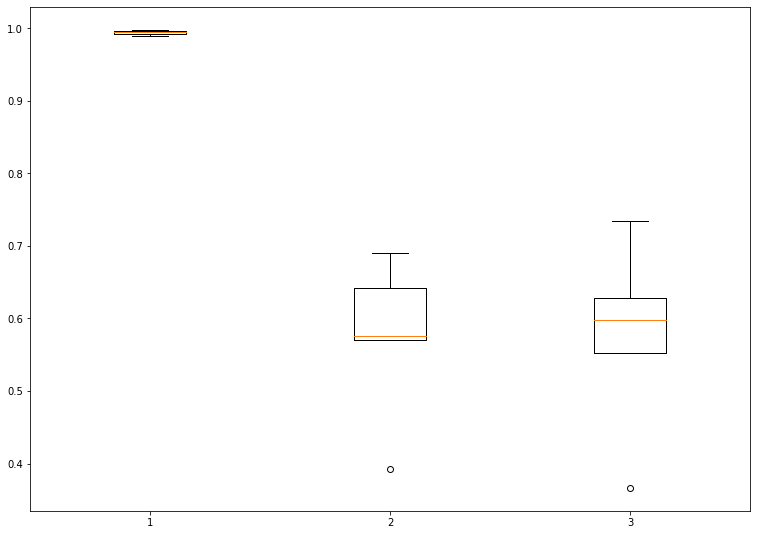

In [ ]:
#BoxPlot for cross validation scores

data_SVC = [cvs_SVC_lda, cvs_SVC_pca, cvs_SVC_normal]

fig_SVC = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax_SVC = fig_SVC.add_axes([0, 0, 1, 1])
  
# Creating plot
bp_SVC = ax_SVC.boxplot(data_SVC)
  
# show plot
plt.show()

##MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

models_MLP = []

def trainMLP(train_data, label_data, test_data,test_label):
  clf = MLPClassifier()
  clf=clf.fit(train_data,label_data)
  models_MLP.append(clf)
  print(clf.score(test_data,test_label))
  cvs = cross_val_score(clf, train_data, label_data, cv=5)
  print(cvs)
  predicted_test = clf.predict(test_data)
  return predicted_test, cvs

##MLP_LDA

In [ ]:
predicted_test_MLP_lda, cvs_MLP_lda =trainMLP(lda_train_data,label_data,lda_test_data,test_label)
predicted_test_MLP_lda

0.4723926380368098
[0.99292035 0.99292035 0.99469027 0.99646018 0.99823009]


array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
pred_MLP_lda=predictDeepFakeResult(predicted_test_MLP_lda,frame_count_test_fake+frame_count_test_real)
print(pred_MLP_lda)

24 5
9 21
10 19
16 13
11 19
15 15
16 14
20 9
18 11
21 8
19 10
16 14
14 16
12 17
11 14
6 17
7 18
14 10
20 4
12 10
18 4
18 6
18 5
15 9
16 7
14 16
10 19
12 18
18 13
17 12
17 12
10 19
10 20
18 11
17 12
5 25
12 17
21 7
20 9
10 19
8 21
14 15
15 14
12 18
19 11
21 9
19 10
20 9
15 15
17 13
[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]


In [ ]:

accuracy_score(actual_test_label, pred_MLP_lda)

0.44

In [ ]:

f1_score(actual_test_label, pred_MLP_lda)

0.48148148148148145

In [ ]:

log_loss(actual_test_label,pred_MLP_lda)

19.341970652327646

##MLP_PCA

In [ ]:
predicted_test_MLP_pca, cvs_MLP_pca =trainMLP(pca_train_data,label_data,pca_test_data,test_label)
predicted_test_MLP_pca

0.6319018404907976
[0.41061947 0.58761062 0.58584071 0.55221239 0.60176991]


array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
pred_MLP_pca=predictDeepFakeResult(predicted_test_MLP_pca,frame_count_test_fake+frame_count_test_real)
print(pred_MLP_pca)

19 10
16 14
9 20
28 1
22 8
22 8
29 1
26 3
13 16
23 6
28 1
30 0
8 22
8 21
12 13
2 21
0 25
9 15
8 16
0 22
0 22
0 24
6 17
6 18
0 23
16 14
9 20
24 6
24 7
21 8
17 12
23 6
28 2
26 3
26 3
27 3
26 3
19 9
26 3
19 10
20 9
26 3
20 9
29 1
22 8
23 7
24 5
14 15
14 16
24 6
[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]


In [ ]:

accuracy_score(actual_test_label, pred_MLP_pca)

0.74

In [ ]:

f1_score(actual_test_label, pred_MLP_pca)

0.7719298245614036

In [ ]:

log_loss(actual_test_label,pred_MLP_pca)

8.980241782162816

##MLP_Normal

In [ ]:
predicted_test_MLP_normal, cvs_MLP_normal =trainMLP(train_data,label_data,test_data,test_label)
predicted_test_MLP_normal

0.5371506475800955
[0.39823009 0.51681416 0.48141593 0.55929204 0.53274336]


array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
pred_MLP_normal=predictDeepFakeResult(predicted_test_MLP_normal,frame_count_test_fake+frame_count_test_real)
print(pred_MLP_normal)

4 25
1 29
1 28
7 22
18 12
13 17
0 30
9 20
0 29
9 20
2 27
21 9
2 28
3 26
0 25
0 23
0 25
0 24
0 24
0 22
0 22
0 24
0 23
0 24
0 23
0 30
6 23
9 21
16 15
11 18
0 29
4 25
16 14
14 15
5 24
1 29
13 16
9 19
18 11
2 27
4 25
7 22
6 23
13 17
0 30
5 25
6 23
17 12
9 21
2 28
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [ ]:

accuracy_score(actual_test_label, pred_MLP_normal)

0.54

In [ ]:

f1_score(actual_test_label, pred_MLP_normal)

0.25806451612903225

In [ ]:

log_loss(actual_test_label,pred_MLP_normal)

15.887869125556122

##Comparison

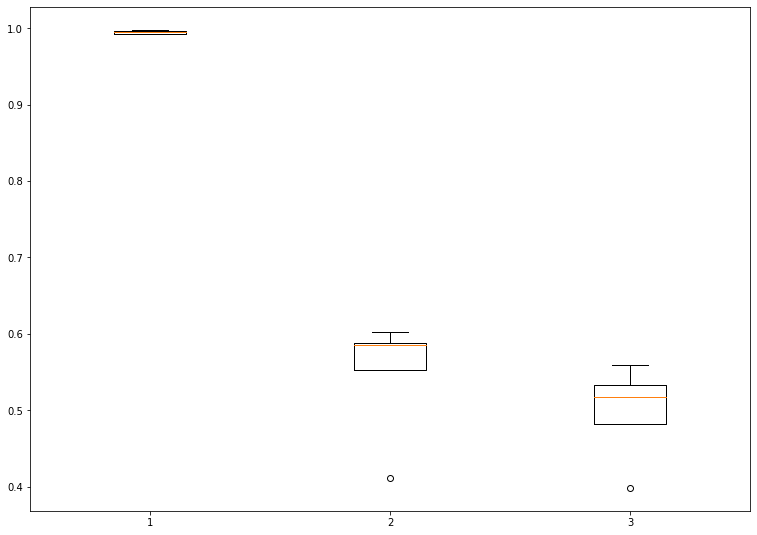

In [ ]:
#BoxPlot for cross validation scores

data_MLP = [cvs_MLP_lda, cvs_MLP_pca, cvs_MLP_normal]

fig_MLP = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax_MLP = fig_MLP.add_axes([0, 0, 1, 1])
  
# Creating plot
bp_MLP = ax_MLP.boxplot(data_MLP)
  
# show plot
plt.show()

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

models_KNN = []

def trainKNN(train_data, label_data, test_data,test_label):
  clf = KNeighborsClassifier(n_neighbors=3)
  clf.fit(train_data,label_data)
  models_KNN.append(clf)
  print(clf.score(test_data,test_label))
  cvs = cross_val_score(clf, train_data, label_data, cv=5)
  print(cvs)
  predicted_test = clf.predict(test_data)
  return predicted_test, cvs

##KNN_LDA

In [ ]:
predicted_test_KNN_lda, cvs_KNN_lda =trainKNN(lda_train_data,label_data,lda_test_data,test_label)
predicted_test_KNN_lda

0.47511929107021134
[0.99292035 0.99115044 0.99292035 0.99646018 0.99823009]


array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
pred_KNN_lda=predictDeepFakeResult(predicted_test_KNN_lda,frame_count_test_fake+frame_count_test_real)
print(pred_KNN_lda)

24 5
10 20
10 19
16 13
11 19
15 15
16 14
20 9
18 11
21 8
19 10
16 14
14 16
13 16
10 15
6 17
7 18
14 10
20 4
12 10
18 4
18 6
17 6
15 9
16 7
14 16
10 19
12 18
18 13
17 12
17 12
10 19
10 20
19 10
17 12
5 25
12 17
21 7
20 9
9 20
9 20
14 15
15 14
12 18
20 10
21 9
19 10
21 8
15 15
18 12
[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]


In [ ]:

accuracy_score(actual_test_label, pred_KNN_lda)

0.44

In [ ]:

f1_score(actual_test_label, pred_KNN_lda)

0.48148148148148145

In [ ]:

log_loss(actual_test_label,pred_KNN_lda)

19.341970652327646

##KNN_PCA

In [ ]:
predicted_test_KNN_pca, cvs_KNN_pca =trainKNN(pca_train_data,label_data,pca_test_data,test_label)
predicted_test_KNN_pca

0.580095432856169
[0.3699115  0.51504425 0.57876106 0.54867257 0.76283186]


array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
pred_KNN_pca=predictDeepFakeResult(predicted_test_KNN_pca,frame_count_test_fake+frame_count_test_real)
print(pred_KNN_pca)

29 0
18 12
8 21
13 16
9 21
17 13
27 3
28 1
18 11
26 3
29 0
30 0
5 25
9 20
20 5
0 23
0 25
12 12
2 22
3 19
0 22
0 24
15 8
1 23
1 22
3 27
10 19
26 4
27 4
20 9
3 26
16 13
30 0
29 0
28 1
21 9
29 0
27 1
12 17
4 25
8 21
19 10
12 17
27 3
17 13
18 12
28 1
22 7
24 6
24 6
[1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]


In [ ]:

accuracy_score(actual_test_label, pred_KNN_pca)

0.64

In [ ]:

f1_score(actual_test_label, pred_KNN_pca)

0.6666666666666666

In [ ]:

log_loss(actual_test_label,pred_KNN_pca)

12.434135413602489

##KNN_Normal

In [ ]:
predicted_test_KNN_normal, cvs_KNN_normal =trainKNN(train_data,label_data,test_data,test_label)
predicted_test_KNN_normal

0.5528289025221541
[0.35575221 0.52920354 0.55929204 0.57168142 0.73982301]


array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
pred_KNN_normal=predictDeepFakeResult(predicted_test_KNN_normal,frame_count_test_fake+frame_count_test_real)
print(pred_KNN_normal)

26 3
26 4
7 22
20 9
13 17
19 11
30 0
27 2
22 7
28 1
29 0
30 0
11 19
9 20
22 3
0 23
0 25
16 8
1 23
6 16
0 22
0 24
14 9
2 22
11 12
9 21
9 20
22 8
24 7
25 4
13 16
11 18
29 1
27 2
26 3
19 11
28 1
27 1
13 16
5 24
9 20
17 12
13 16
26 4
28 2
9 21
28 1
17 12
24 6
28 2
[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1]


In [ ]:

accuracy_score(actual_test_label, pred_KNN_normal)

0.56

In [ ]:

f1_score(actual_test_label, pred_KNN_normal)

0.5925925925925927

In [ ]:

log_loss(actual_test_label,pred_KNN_normal)

15.197269509092553

##Comparison

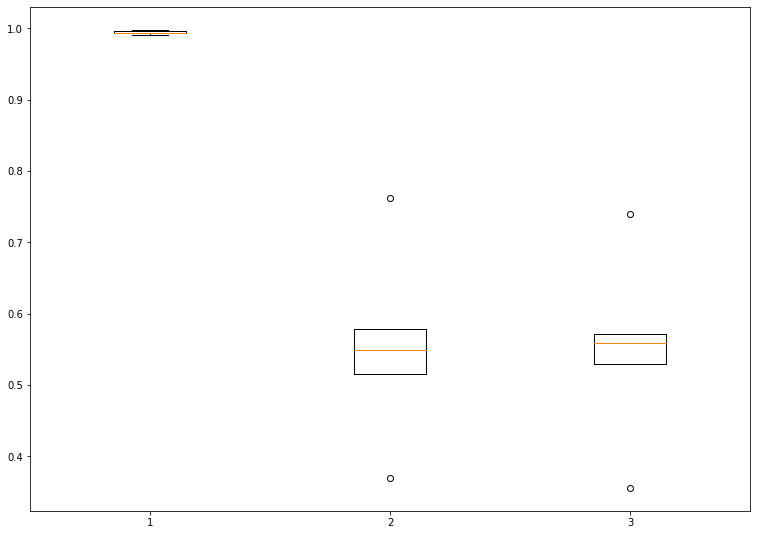

In [ ]:
#BoxPlot for cross validation scores

data_KNN = [cvs_KNN_lda, cvs_KNN_pca, cvs_KNN_normal]

fig_KNN = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax_KNN = fig_KNN.add_axes([0, 0, 1, 1])
  
# Creating plot
bp_KNN = ax_KNN.boxplot(data_KNN)
  
# show plot
plt.show()

##Comparison for LDAs

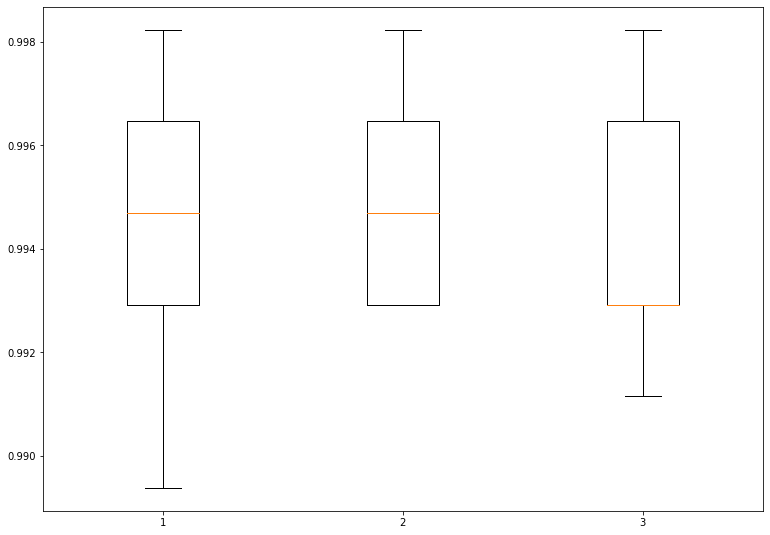

In [ ]:
#BoxPlot for cross validation scores

data_LDA = [cvs_SVC_lda, cvs_MLP_lda, cvs_KNN_lda]

fig_LDA = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax_LDA = fig_LDA.add_axes([0, 0, 1, 1])
  
# Creating plot
bp_LDA = ax_LDA.boxplot(data_LDA)
  
# show plot
plt.show()

##Comparison for PCAs

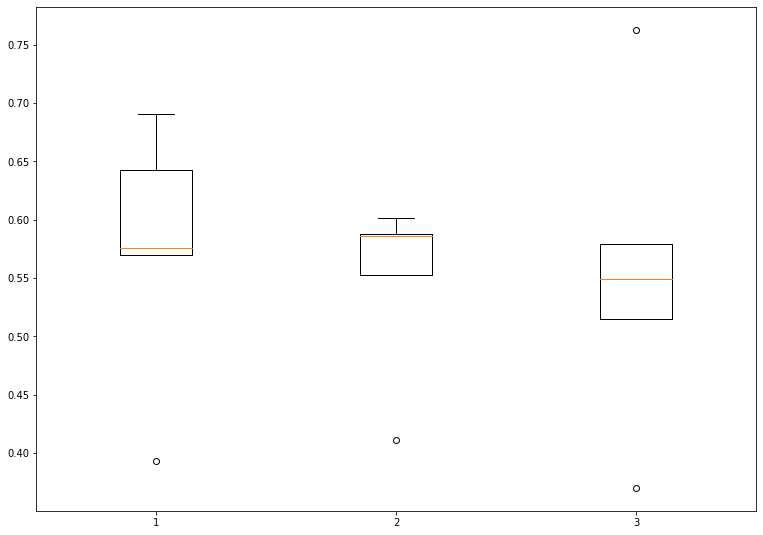

In [ ]:
#BoxPlot for cross validation scores

data_PCA = [cvs_SVC_pca, cvs_MLP_pca, cvs_KNN_pca]

fig_PCA = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax_PCA = fig_PCA.add_axes([0, 0, 1, 1])
  
# Creating plot
bp_PCA = ax_PCA.boxplot(data_PCA)
  
# show plot
plt.show()

##Comparison for Normals

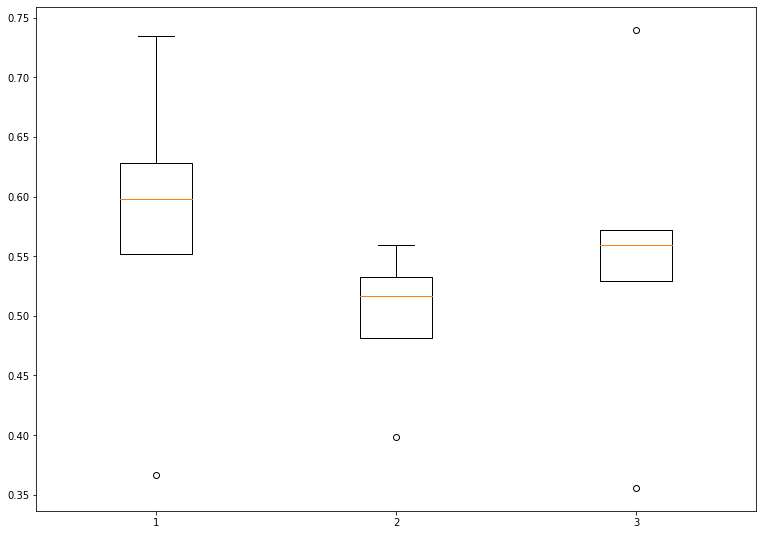

In [ ]:
#BoxPlot for cross validation scores

data_NORMAL = [cvs_SVC_normal, cvs_MLP_normal, cvs_KNN_normal]

fig_NORMAL = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax_NORMAL = fig_NORMAL.add_axes([0, 0, 1, 1])
  
# Creating plot
bp_NORMAL = ax_NORMAL.boxplot(data_NORMAL)
  
# show plot
plt.show()

##CNN

In [ ]:
def createImageArray(path_list):
  img_list = []
  for path in path_list:
    img = cv2.imread(path)
    img_list.append(img)
  return img_list

In [ ]:
# train_images_dlib_CNN = createImageArray(processedImagePath_Train_Fake_dlib + processedImagePath_Train_Real_dlib)
train_images_dlib_CNN = createImageArray(processedImagePath_Train_Real_dlib + processedImagePath_Train_Fake_dlib )

In [ ]:
train_images_dlib_label_CNN = [1]*len(processedImagePath_Train_Real_dlib) + [0]*len(processedImagePath_Train_Fake_dlib) 

In [ ]:
val_images_dlib_CNN = createImageArray(processedImagePath_Val_Fake_dlib + processedImagePath_Val_Real_dlib)

In [ ]:
val_images_dlib_label_CNN = [0]*len(processedImagePath_Val_Fake_dlib) + [1]*len(processedImagePath_Val_Real_dlib)

In [ ]:
test_images_dlib_CNN = createImageArray(processedImagePath_Test_Fake_dlib + processedImagePath_Test_Real_dlib)

In [ ]:
test_images_dlib_label_CNN = [0]*len(processedImagePath_Test_Fake_dlib) + [1]*len(processedImagePath_Test_Real_dlib)

In [ ]:
train_images_dlib_CNN_noise = createImageArray(processedImagePath_Train_Real_dlib_noise + processedImagePath_Train_Fake_dlib_noise )

In [ ]:
train_images_dlib_label_CNN_noise = [1]*len(processedImagePath_Train_Real_dlib_noise) + [0]*len(processedImagePath_Train_Fake_dlib_noise) 

In [ ]:
# processedImagePath_Train

In [ ]:
train_images_dlib_CNN = np.array(train_images_dlib_CNN)
train_images_dlib_label_CNN = np.array(train_images_dlib_label_CNN)
val_images_dlib_CNN = np.array(val_images_dlib_CNN)
val_images_dlib_label_CNN  = np.array(val_images_dlib_label_CNN )

In [ ]:
test_images_dlib_CNN = np.array(test_images_dlib_CNN)
test_images_dlib_label_CNN  = np.array(test_images_dlib_label_CNN )

In [ ]:
train_images_dlib_CNN_noise = np.array(train_images_dlib_CNN_noise)
train_images_dlib_label_CNN_noise = np.array(train_images_dlib_label_CNN_noise)

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf

In [ ]:
batch_size = 100
epochs = 20
num_classes = 2

In [ ]:
# cnn = Sequential()

# cnn.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(64,64,3),padding='same'))
# cnn.add(LeakyReLU(alpha=0.1))
# cnn.add(MaxPooling2D((2, 2),padding='same'))
# cnn.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
# cnn.add(LeakyReLU(alpha=0.1))
# cnn.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# cnn.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
# cnn.add(LeakyReLU(alpha=0.1))                  
# cnn.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# cnn.add(Flatten())
# cnn.add(Dense(128, activation='linear'))
# cnn.add(LeakyReLU(alpha=0.1))                  
# cnn.add(Dense(num_classes, activation='softmax'))


classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
classifier.add(MaxPooling2D((2, 2),padding='same'))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
classifier.add(Dropout(0.4))

# classifier.add(LeakyReLU(alpha=0.1))  
classifier.add(Flatten())
# classifier.add(Dense(2, activation='softmax'))
# classifier.add(Dense(units = 128, activation = 'relu'))
# classifier.add(Dense(units = 1, activation = 'sigmoid'))
# classifier.add(keras.layers.Dense(1, activation=tf.nn.softmax))
# classifier.add(keras.layers.Activation('sigmoid'))
classifier.add(Dropout(0.3))

classifier.add(keras.layers.Activation('sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# cnn.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
classifier.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
# cnn.summary()
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

In [ ]:
train_images_dlib_CNN = train_images_dlib_CNN.astype('float32')
val_images_dlib_CNN = val_images_dlib_CNN.astype('float32')
train_images_dlib_CNN  = train_images_dlib_CNN  / 255.
val_images_dlib_CNN = val_images_dlib_CNN / 255.

In [ ]:
test_images_dlib_CNN = test_images_dlib_CNN.astype('float32')
test_images_dlib_CNN  = test_images_dlib_CNN  / 255

In [ ]:
train_images_dlib_CNN_noise = train_images_dlib_CNN_noise.astype('float32')
train_images_dlib_CNN_noise  = train_images_dlib_CNN_noise / 255

In [ ]:
# train_cnn = classifier.fit(train_images_dlib_CNN, train_images_dlib_label_CNN, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(val_images_dlib_CNN, val_images_dlib_label_CNN))
# train_cnn = classifier.fit(train_images_dlib_CNN, train_images_dlib_label_CNN, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(val_images_dlib_CNN, val_images_dlib_label_CNN),validation_steps = 2000)

Epoch 1/20


ValueError: ignored

In [ ]:
predicted_test_CNN= classifier.predict(test_images_dlib_CNN)

In [ ]:
pred_CNN_dlib = predictDeepFakeResult(predicted_test_CNN,frame_count_test_fake+frame_count_test_real)

In [ ]:
print(pred_CNN_dlib)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(actual_test_label, pred_CNN_dlib)

In [ ]:
from sklearn.metrics import f1_score
f1_score(actual_test_label, pred_CNN_dlib)

In [ ]:
from sklearn.metrics import log_loss
log_loss(actual_test_label, pred_CNN_dlib)

##MobileNetV2

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [ ]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [ ]:
def binarizeLabels(label_cnn):
  lb = LabelBinarizer()
  label_cnn = lb.fit_transform(label_cnn)
  label_cnn = to_categorical(label_cnn)
  return label_cnn

train_images_dlib_label_CNN_B = binarizeLabels(train_images_dlib_label_CNN)
val_images_dlib_label_CNN_B = binarizeLabels(val_images_dlib_label_CNN)
test_images_dlib_label_CNN_B = binarizeLabels(test_images_dlib_label_CNN)

In [ ]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(64, 64,3)))

In [ ]:
first_cnn_model = baseModel.output
first_cnn_model = AveragePooling2D(pool_size=(2, 2))(first_cnn_model)
first_cnn_model = Flatten(name="flatten")(first_cnn_model)
first_cnn_model = Dense(128, activation="relu")(first_cnn_model)
first_cnn_model = Dropout(0.5)(first_cnn_model)
first_cnn_model = Dense(2, activation="softmax")(first_cnn_model)

In [ ]:
model = Model(inputs=baseModel.input, outputs=first_cnn_model)

In [ ]:
for layer in baseModel.layers:
	layer.trainable = False

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
CNN = model.fit(
	aug.flow(train_images_dlib_CNN, train_images_dlib_label_CNN_B, batch_size=BS),
	steps_per_epoch=len(train_images_dlib_CNN) // BS,
	validation_data=(val_images_dlib_CNN, val_images_dlib_label_CNN_B),
	validation_steps=len(val_images_dlib_CNN) // BS,
	epochs=EPOCHS)

Epoch 1/20
88/88 [==============================] - 8s 60ms/step - loss: 0.8564 - accuracy: 0.5091 - val_loss: 0.7280 - val_accuracy: 0.5273
Epoch 2/20
88/88 [==============================] - 4s 51ms/step - loss: 0.7382 - accuracy: 0.5714 - val_loss: 0.6649 - val_accuracy: 0.5832
Epoch 3/20
88/88 [==============================] - 4s 49ms/step - loss: 0.6858 - accuracy: 0.6044 - val_loss: 0.6616 - val_accuracy: 0.5741
Epoch 4/20
88/88 [==============================] - 4s 48ms/step - loss: 0.6650 - accuracy: 0.6198 - val_loss: 0.6368 - val_accuracy: 0.6105
Epoch 5/20
88/88 [==============================] - 4s 49ms/step - loss: 0.6663 - accuracy: 0.6244 - val_loss: 0.6309 - val_accuracy: 0.6266
Epoch 6/20
88/88 [==============================] - 4s 51ms/step - loss: 0.6428 - accuracy: 0.6334 - val_loss: 0.6278 - val_accuracy: 0.6259
Epoch 7/20
88/88 [==============================] - 4s 48ms/step - loss: 0.6385 - accuracy: 0.6409 - val_loss: 0.6292 - val_accuracy: 0.6147
Epoch 8/20
88

In [ ]:
from sklearn.metrics import accuracy_score
predIdxs = model.predict(test_images_dlib_CNN, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

test_Y = np.argmax(test_images_dlib_label_CNN_B, axis=1)
print(accuracy_score(test_Y,predIdxs))

0.6687116564417178


In [ ]:
test_Y_ = np.argmax(test_Y, axis=0)

In [ ]:
print(classification_report(test_Y, predIdxs))

              precision    recall  f1-score   support

           0       0.65      0.60      0.62       671
           1       0.68      0.73      0.70       796

    accuracy                           0.67      1467
   macro avg       0.67      0.66      0.66      1467
weighted avg       0.67      0.67      0.67      1467



In [ ]:
from sklearn.metrics import log_loss

log_loss(test_Y,predIdxs)

11.44244064051487

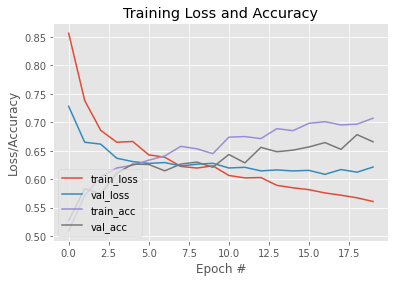

In [ ]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), CNN.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), CNN.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), CNN.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), CNN.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


##InceptionResnetV2

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical

In [ ]:
def resizingImages(img_list):
  newImgList=[]
  for i in img_list:
    img = cv2.resize(i,(128, 128), interpolation=cv2.INTER_CUBIC)
    newImgList.append(img)
  return np.array(newImgList)

In [ ]:
train_Resizedimages_dlib_label = [0]*len(processedImagePath_Train_Fake_dlib) + [1]*len(processedImagePath_Train_Real_dlib)
train_Resizedimages_dlib_label = to_categorical(train_Resizedimages_dlib_label,2)
val_Resizedimages_dlib_label = [0]*len(processedImagePath_Val_Fake_dlib) + [1]*len(processedImagePath_Val_Real_dlib)
val_Resizedimages_dlib_label = to_categorical(val_Resizedimages_dlib_label,2)
test_Resizedimages_dlib_label = [0]*len(processedImagePath_Test_Fake_dlib) + [1]*len(processedImagePath_Test_Real_dlib)
test_Resizedimages_dlib_label = to_categorical(test_Resizedimages_dlib_label,2)
# train_images_dlib_label_CNN = [[1,0] for i in range(len(processedImagePath_Train_Fake_dlib))] + [[0,1] for i in range(len(processedImagePath_Train_Real_dlib))]
# val_images_dlib_label_CNN = [[1,0] for i in range(len(processedImagePath_Val_Fake_dlib))] + [[0,1] for i in range(len(processedImagePath_Val_Real_dlib))]
# print(train_images_dlib_label_CNN)

In [ ]:
train_Resizedimages_dlib_label_noise = [0]*len(processedImagePath_Train_Fake_dlib_noise) + [1]*len(processedImagePath_Train_Real_dlib_noise)

In [ ]:
print(train_Resizedimages_dlib_label)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
train_Resizedimages_dlib = resizingImages(train_images_dlib_CNN)
# train_Resizedimages_dlib_label = np.array(train_images_dlib_label_CNN)
val_Resizedimages_dlib = resizingImages(val_images_dlib_CNN)
# val_Resizedimages_dlib_label = np.array(val_images_dlib_label_CNN )

In [ ]:
# test_images_dlib_label_CNN = [[1,0] for i in range(len(processedImagePath_Test_Fake_dlib))] + [[0,1] for i in range(len(processedImagePath_Test_Real_dlib))]
test_Resizedimages_dlib = resizingImages(test_images_dlib_CNN)
# test_Resizedimages_dlib_label  = np.array(test_images_dlib_label_CNN )

In [ ]:
train_Resizedimages_dlib_noise = resizingImages(train_images_dlib_CNN_noise)

In [ ]:
train_Resizedimages_dlib = train_Resizedimages_dlib.astype('float32')
val_Resizedimages_dlib = val_Resizedimages_dlib.astype('float32')
train_Resizedimages_dlib  = train_Resizedimages_dlib  / 255.
val_Resizedimages_dlib = val_Resizedimages_dlib / 255.

In [ ]:
test_Resizedimages_dlib = test_Resizedimages_dlib.astype('float32')
test_Resizedimages_dlib = test_Resizedimages_dlib / 255

In [ ]:
train_Resizedimages_dlib_noise = train_Resizedimages_dlib_noise.astype('float32')
train_Resizedimages_dlib_noise  = train_Resizedimages_dlib_noise / 255.

In [ ]:
x = []
# train_Resizedimages_dlib_label_noise_list = []
train_Resizedimages_dlib_label_list = []

# for i in range(len(train_Resizedimages_dlib_label_noise)):
#   train_Resizedimages_dlib_label_noise_list.append(list(train_Resizedimages_dlib_label_noise[i]))

for i in range(len(train_Resizedimages_dlib_label)):
  train_Resizedimages_dlib_label_list.append(list(train_Resizedimages_dlib_label[i]))
x = train_Resizedimages_dlib_label_list

s = train_Resizedimages_dlib_label_noise

for i in range(len(s)):
  if(s[i]==1):
    x.append([0,1])
  else:
    x.append([1,0])


In [ ]:
googleNet_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(128,128,3))
googleNet_model.trainable = True
model = Sequential()
model.add(googleNet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=2, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])
model.summary()

219062272/219055592 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 2, 2, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 3074      
Total params: 54,339,810
Trainable params: 54,279,266
Non-trainable params: 60,544
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
len(train_data)

2825

In [ ]:
len(x)

5650

In [ ]:
train_data[0]

[81,
 81,
 80,
 79,
 78,
 79,
 86,
 94,
 104,
 108,
 111,
 111,
 108,
 109,
 109,
 108,
 106,
 108,
 111,
 116,
 120,
 121,
 121,
 121,
 118,
 115,
 112,
 112,
 111,
 111,
 112,
 115,
 115,
 114,
 113,
 109,
 104,
 102,
 99,
 95,
 95,
 94,
 85,
 81,
 76,
 65,
 47,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 79,
 83,
 81,
 83,
 80,
 86,
 86,
 88,
 96,
 101,
 106,
 109,
 108,
 109,
 108,
 107,
 104,
 107,
 113,
 119,
 120,
 121,
 120,
 120,
 117,
 117,
 116,
 115,
 114,
 116,
 118,
 119,
 119,
 115,
 113,
 110,
 107,
 105,
 101,
 98,
 97,
 94,
 91,
 83,
 79,
 67,
 43,
 4,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 79,
 82,
 79,
 86,
 82,
 88,
 83,
 83,
 90,
 94,
 99,
 106,
 108,
 109,
 108,
 108,
 105,
 108,
 111,
 115,
 117,
 119,
 120,
 119,
 122,
 125,
 124,
 121,
 120,
 122,
 123,
 122,
 123,
 118,
 115,
 115,
 111,
 107,
 103,
 100,
 99,
 97,
 95,
 82,
 79,
 71,
 45,
 6,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 7

In [ ]:
type(train_Resizedimages_dlib)

numpy.ndarray

In [ ]:
EPOCHS = 5
BATCH_SIZE = 16

history = model.fit(train_Resizedimages_dlib, train_Resizedimages_dlib_label, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data = (val_Resizedimages_dlib, val_Resizedimages_dlib_label), verbose = 1)
# history = model.fit(np.array(train_list), np.array(x), batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data = (val_Resizedimages_dlib, val_Resizedimages_dlib_label), verbose = 1)

Epoch 1/5
177/177 [==============================] - 57s 201ms/step - loss: 0.6115 - accuracy: 0.6697 - val_loss: 1182.0015 - val_accuracy: 0.4692
Epoch 2/5
177/177 [==============================] - 30s 172ms/step - loss: 0.4411 - accuracy: 0.8308 - val_loss: 61814.7695 - val_accuracy: 0.4692
Epoch 3/5
177/177 [==============================] - 30s 171ms/step - loss: 0.2892 - accuracy: 0.9009 - val_loss: 10594.5938 - val_accuracy: 0.4888
Epoch 4/5
177/177 [==============================] - 30s 170ms/step - loss: 0.1753 - accuracy: 0.9455 - val_loss: 733.4173 - val_accuracy: 0.2923
Epoch 5/5
177/177 [==============================] - 30s 172ms/step - loss: 0.1044 - accuracy: 0.9710 - val_loss: 119.2652 - val_accuracy: 0.2594


In [ ]:
predicted_test_Inception= model.predict_classes(test_Resizedimages_dlib)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
#predicted_test_Inception.sort()
print(predicted_test_Inception)

[0 0 0 ... 0 0 0]


In [ ]:
pred_Inception_dlib = predictDeepFakeResult(predicted_test_Inception,frame_count_test_fake+frame_count_test_real)
print(pred_Inception_dlib)

15 14
26 4
15 14
11 18
0 30
25 5
0 30
13 16
12 17
0 29
0 29
1 29
2 28
1 28
25 0
23 0
25 0
24 0
24 0
22 0
22 0
24 0
23 0
23 1
23 0
1 29
0 29
2 28
6 25
2 27
10 19
0 29
4 26
7 22
12 17
2 28
1 28
0 28
0 29
0 29
0 29
2 27
4 25
5 25
7 23
2 28
0 29
7 22
0 30
1 29
[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(actual_test_label, pred_Inception_dlib)

0.2

In [ ]:
from sklearn.metrics import f1_score
f1_score(actual_test_label, pred_Inception_dlib)

0.0

In [ ]:
from sklearn.metrics import log_loss
log_loss(actual_test_label, pred_Inception_dlib)

27.6312609951576

##Efficient Net

In [ ]:
!pip install efficientnet

In [ ]:
from efficientnet.tfkeras import EfficientNetB4
from keras.regularizers import l2
efficient_net = EfficientNetB4(
    weights = 'imagenet',
    input_shape = (64, 64, 3),
    include_top = False,
    pooling = 'max'
)

model = Sequential()
model.add(efficient_net)
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b4 (Functional) (None, 1792)              17673816  
_________________________________________________________________
dense_6 (Dense)              (None, 512)               918016    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 18,657,625
Trainable params: 18,532,425
Non-trainable params: 125,200
_________________________________________________________________


In [ ]:
batch_size = 32
epochs = 10
num_classes = 2

In [ ]:
# cnn.summary()
# classifier.summary()
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
x = []
# train_Resizedimages_dlib_label_noise_list = []
train_Resizedimages_dlib_label_list = []

# for i in range(len(train_Resizedimages_dlib_label_noise)):
#   train_Resizedimages_dlib_label_noise_list.append(list(train_Resizedimages_dlib_label_noise[i]))

for i in range(len(train_Resizedimages_dlib_label)):
  train_Resizedimages_dlib_label_list.append(list(train_Resizedimages_dlib_label[i]))

# x = train_Resizedimages_dlib_label_noise 

# s = train_Resizedimages_dlib_label_list

# for i in range(len(s)):
#   if(s[i][0]==1):
#     x.append(0)
#   else:
#     x.append(1)


In [ ]:
train_list = []
train_Resizedimages_dlib_noise_list = []
train_Resizedimages_dlib_list = []

# for i in range(len(train_Resizedimages_dlib_noise)):
#   train_Resizedimages_dlib_noise_list.append(list(train_Resizedimages_dlib_noise[i]))

for i in range(len(train_Resizedimages_dlib)):
  train_Resizedimages_dlib_list.append(list(train_Resizedimages_dlib[i]))

# x = train_Resizedimages_dlib_label_noise 
train_list = train_Resizedimages_dlib_noise_list + train_Resizedimages_dlib_list 


In [ ]:
y = []
for i in range(len(val_Resizedimages_dlib_label)):
  if(val_Resizedimages_dlib_label[i][0]==1):
    y.append(0)
  else:
    y.append(1)

In [ ]:
len(x)

0

In [ ]:
len(train_list)

2825

In [ ]:
train_cnn = model.fit(train_images_dlib_CNN, train_images_dlib_label_CNN, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(val_images_dlib_CNN, val_images_dlib_label_CNN))
# train_cnn = model.fit(np.array(train_list) , np.array(x),epochs=epochs,verbose=1,validation_data=(val_Resizedimages_dlib, np.array(y)),validation_steps = 80 )

Epoch 1/10
89/89 [==============================] - 34s 169ms/step - loss: 0.7643 - accuracy: 0.5639 - val_loss: 0.7232 - val_accuracy: 0.5329
Epoch 2/10
89/89 [==============================] - 12s 138ms/step - loss: 0.5875 - accuracy: 0.7073 - val_loss: 0.6952 - val_accuracy: 0.5825
Epoch 3/10
89/89 [==============================] - 12s 136ms/step - loss: 0.4339 - accuracy: 0.8085 - val_loss: 0.7473 - val_accuracy: 0.6280
Epoch 4/10
89/89 [==============================] - 12s 136ms/step - loss: 0.3243 - accuracy: 0.8740 - val_loss: 0.8807 - val_accuracy: 0.6566
Epoch 5/10
89/89 [==============================] - 12s 137ms/step - loss: 0.2454 - accuracy: 0.9055 - val_loss: 1.0407 - val_accuracy: 0.6678
Epoch 6/10
89/89 [==============================] - 14s 155ms/step - loss: 0.2090 - accuracy: 0.9225 - val_loss: 1.1842 - val_accuracy: 0.6713
Epoch 7/10
89/89 [==============================] - 13s 142ms/step - loss: 0.1649 - accuracy: 0.9455 - val_loss: 1.2756 - val_accuracy: 0.6685

In [ ]:
len(x)

0

In [ ]:
# predicted_test_CNN= model.predict(test_Resizedimages_dlib)
predicted_test_CNN= model.predict(test_images_dlib_CNN)

In [ ]:
pred_CNN_dlib = predictDeepFakeResult(predicted_test_CNN,frame_count_test_fake+frame_count_test_real)

21 8
17 13
8 21
21 8
22 8
20 10
28 2
24 5
9 20
29 0
29 0
30 0
24 6
28 1
0 25
0 23
0 25
0 24
0 24
0 22
0 22
1 23
0 23
2 22
0 23
21 9
26 3
27 3
31 0
27 2
21 8
28 1
28 2
28 1
29 0
30 0
28 1
15 13
25 4
24 5
28 1
29 0
29 0
29 1
27 3
25 5
27 2
21 8
27 3
27 3


In [ ]:
print(pred_CNN_dlib)
print(actual_test_label)
print(predicted_test_CNN)

[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[[0.9744959 ]
 [0.99598515]
 [0.99927944]
 ...
 [0.9991992 ]
 [0.9987092 ]
 [0.5382068 ]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(actual_test_label, pred_CNN_dlib)

0.76

In [ ]:
from sklearn.metrics import f1_score
f1_score(actual_test_label, pred_CNN_dlib)

0.8064516129032258

In [ ]:
from sklearn.metrics import log_loss
log_loss(actual_test_label, pred_CNN_dlib)

8.289498238161812

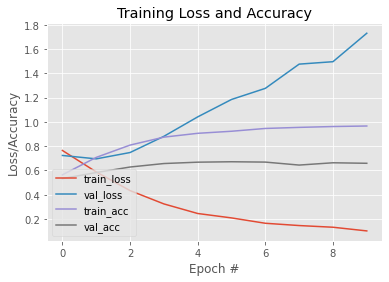

In [ ]:
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), train_cnn.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), train_cnn.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), train_cnn.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), train_cnn.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")